# 1.1.7 Normality Test

## Related readings :
- <a href="https://medium.com/geekculture/normal-distribution-and-normality-test-9e2b6e1a7bba">Normal Distribution and Normality Test</a>
- <a href="https://towardsdatascience.com/testing-for-normality-using-skewness-and-kurtosis-afd61be860">Testing for Normality using Skewness and Kurtosis</a>
- <a href="https://readmedium.com/en/https:/medium.com/@amitprius/fully-understand-q-q-plot-for-probability-distribution-in-machine-learning-7ba16166cae6">Understand Q-Q Plot for Probability Distribution</a>
- <a href="https://readmedium.com/en/https:/medium.com/towards-data-science/how-to-use-q-q-plot-for-checking-the-distribution-of-our-data-c798d0577369">How to use Q-Q plot for checking the distribution of our data</a>
- <a href="https://medium.com/@snp.kriss/try-normality-tests-using-all-available-python-libraries-142e60c986f4">Normality tests using Python libraries</a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
def generate_data():
    # Normal distribution
    data_normal = np.random.normal(loc=0, scale=1, size=1000)
    
    # Skewed distribution
    data_skewed = np.random.exponential(scale=2, size=1000)
    
    # Bimodal distribution
    data_bimodal = np.concatenate([np.random.normal(loc=-2, scale=1, size=500), np.random.normal(loc=3, scale=1.5, size=500)])
    
    return data_normal, data_skewed, data_bimodal

In [3]:
def perform_normality_tests(data):
    shapiro_stat, shapiro_p = stats.shapiro(data)
    ks_stat, ks_p = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
    return (shapiro_stat, shapiro_p), (ks_stat, ks_p)

In [4]:
def plot_data(data, title, shapiro_p, ks_p):
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(data, bins=30, kde=True, color='skyblue')
    plt.title(f'{title} - Histogram')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'{title} - Q-Q Plot')
    
    plt.suptitle(f'{title}\nShapiro-Wilk p-value: {shapiro_p:.2e}, Kolmogorov-Smirnov p-value: {ks_p:.2e}', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

Normal Distribution: Shapiro-Wilk p-value = 8.90e-02, Kolmogorov-Smirnov p-value = 6.45e-01


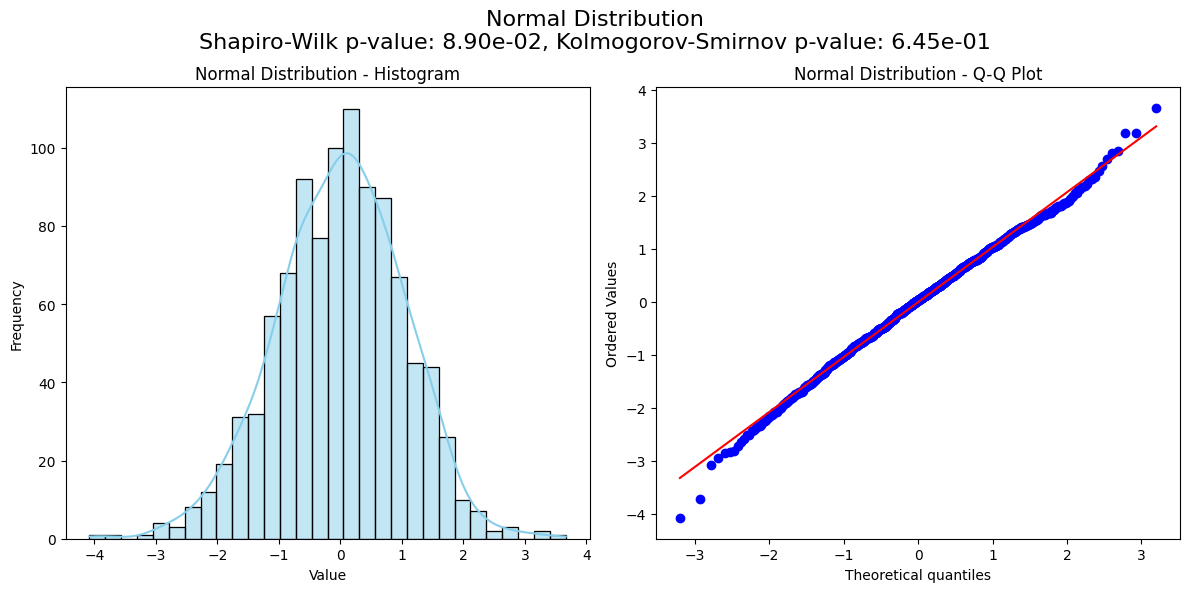

In [5]:
# Generate data
data_normal, data_skewed, data_bimodal = generate_data()

# Perform normality tests
shapiro_ks_normal = perform_normality_tests(data_normal)
# Print normality test results
print("Normal Distribution: Shapiro-Wilk p-value = {:.2e}, Kolmogorov-Smirnov p-value = {:.2e}".format(shapiro_ks_normal[0][1], shapiro_ks_normal[1][1]))
# Plot data
plot_data(data_normal, 'Normal Distribution', shapiro_ks_normal[0][1], shapiro_ks_normal[1][1])

Skewed Distribution: Shapiro-Wilk p-value = 1.54e-33, Kolmogorov-Smirnov p-value = 3.19e-23


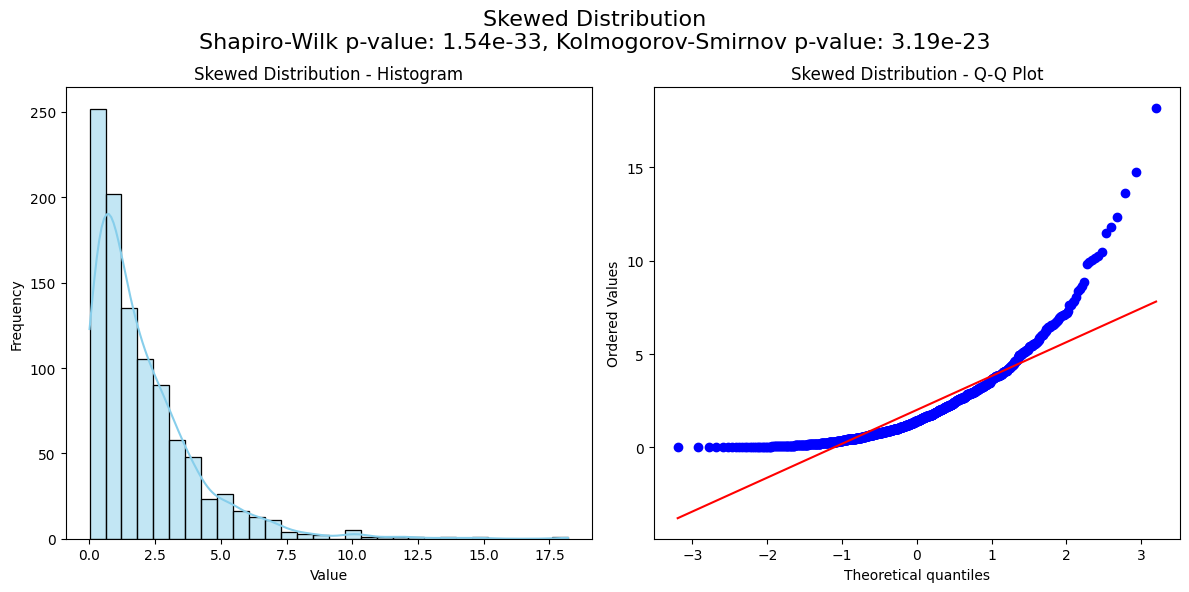

In [6]:
shapiro_ks_skewed = perform_normality_tests(data_skewed)
print("Skewed Distribution: Shapiro-Wilk p-value = {:.2e}, Kolmogorov-Smirnov p-value = {:.2e}".format(shapiro_ks_skewed[0][1], shapiro_ks_skewed[1][1]))
plot_data(data_skewed, 'Skewed Distribution', shapiro_ks_skewed[0][1], shapiro_ks_skewed[1][1])

Bimodal Distribution: Shapiro-Wilk p-value = 2.34e-20, Kolmogorov-Smirnov p-value = 1.06e-16


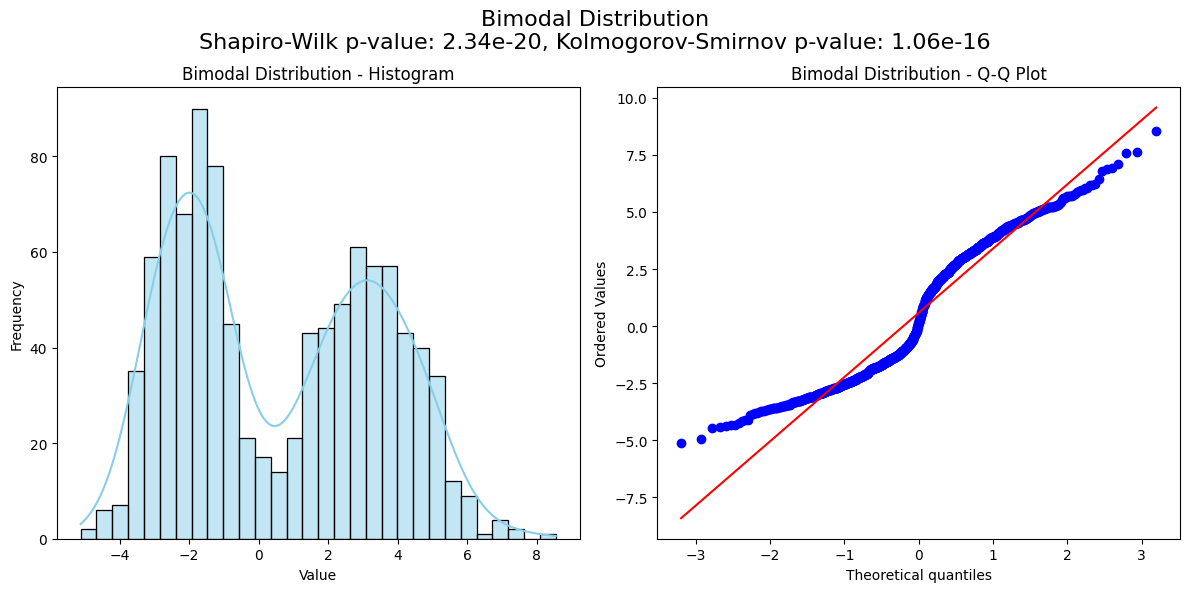

In [7]:
shapiro_ks_bimodal = perform_normality_tests(data_bimodal)
print("Bimodal Distribution: Shapiro-Wilk p-value = {:.2e}, Kolmogorov-Smirnov p-value = {:.2e}".format(shapiro_ks_bimodal[0][1], shapiro_ks_bimodal[1][1]))
plot_data(data_bimodal, 'Bimodal Distribution', shapiro_ks_bimodal[0][1], shapiro_ks_bimodal[1][1])

## Conclusion

In this analysis, we performed normality tests (Shapiro-Wilk and Kolmogorov-Smirnov) on three types of data distributions: normal, skewed, and bimodal. We also visualized the data using histograms with KDE plots and Q-Q plots to aid in the interpretation of these tests.

### Normal Distribution
- **Shapiro-Wilk p-value**: High p-value, indicating that we fail to reject the null hypothesis, suggesting the data is normally distributed.
- **Kolmogorov-Smirnov p-value**: High p-value, further indicating that the data is normally distributed.
- The histogram and Q-Q plot confirm the normality of the data.

### Skewed Distribution
- **Shapiro-Wilk p-value**: Low p-value, indicating that we reject the null hypothesis, suggesting the data is not normally distributed.
- **Kolmogorov-Smirnov p-value**: Low p-value, further indicating that the data is not normally distributed.
- The histogram shows a long right tail, and the Q-Q plot deviates significantly from the diagonal line, indicating skewness.

### Bimodal Distribution
- **Shapiro-Wilk p-value**: Low p-value, indicating that we reject the null hypothesis, suggesting the data is not normally distributed.
- **Kolmogorov-Smirnov p-value**: Low p-value, further indicating that the data is not normally distributed.
- The histogram shows two distinct peaks, and the Q-Q plot deviates from the diagonal line, indicating bimodality.

The visualizations provided a clear depiction of the data shape and helped in understanding the normality characteristics of each distribution. This analysis demonstrates the importance of using normality tests and visualizations to assess the distribution of data.
